In [1]:
# LOADING LIBRARIES
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
path = os.getcwd()

In [3]:
# Loading the complaints dataset
df_complaints = pd.read_csv(os.path.join(path, 'BPI2016_Complaints.csv'), sep=";", encoding='latin-1')

In [4]:
# Transform the date into timestamp
df_complaints['ContactDate'] = pd.to_datetime(df_complaints['ContactDate'], format='%Y-%m-%d')

In [5]:
# Add a new column "Month"
df_complaints['Month'] = df_complaints['ContactDate'].dt.strftime('%m')

In [6]:
counts_topic_month = df_complaints.groupby(['ComplaintTopic_EN', 'Month']).count().unstack()

In [7]:
df = counts_topic_month.CustomerID

In [8]:
# print the index of the max and the number 
print(df.idxmax())
print(df.max())

Month
01         Information: incorrect/inconsistent
02              no respect/not taken seriously
07         Information: incorrect/inconsistent
08              no respect/not taken seriously
09         Information: incorrect/inconsistent
10                Information: no/insufficient
11    payment over a certain period is missing
12                  income form ww unreachable
dtype: object
Month
01     8.0
02     7.0
07     3.0
08     2.0
09     6.0
10     4.0
11     6.0
12    15.0
dtype: float64


In [9]:
counts_type_complaints = df_complaints.groupby(['ComplaintTopic_EN']).count().unstack()
type_complaints = counts_type_complaints.CustomerID

In [10]:
type_complaints[type_complaints>7].sort_values(ascending=False)

ComplaintTopic_EN
Information: incorrect/inconsistent         34
no respect/not taken seriously              25
income form ww unreachable                  21
Information: no/insufficient                20
payment over a certain period is missing    19
Website not available                       11
ikf non/late processing                     10
ikf digital unavailable                      8
dtype: int64

In [11]:
type_complaints_cumul = 100 * ((type_complaints.sort_values(ascending=False).cumsum())/289)
type_complaints_cumul[type_complaints_cumul<52]

ComplaintTopic_EN
Information: incorrect/inconsistent         11.764706
no respect/not taken seriously              20.415225
income form ww unreachable                  27.681661
Information: no/insufficient                34.602076
payment over a certain period is missing    41.176471
Website not available                       44.982699
ikf non/late processing                     48.442907
ikf digital unavailable                     51.211073
dtype: float64

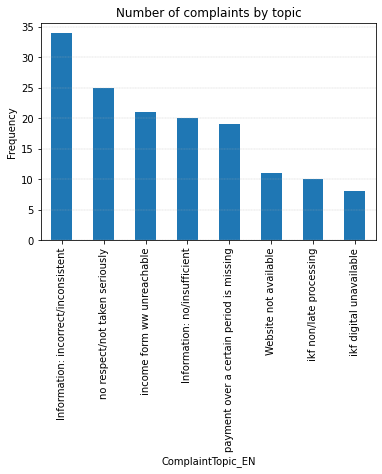

In [13]:
ax = type_complaints[type_complaints>7].sort_values(ascending = False).plot(kind='bar',stacked = False, colormap='tab20')

plt.xticks(rotation = 90)
plt.ylabel ('Frequency')
plt.title('Number of complaints by topic')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
plt.show()

In [14]:
counts = df_complaints.groupby(['Month', 'Gender']).count().unstack()

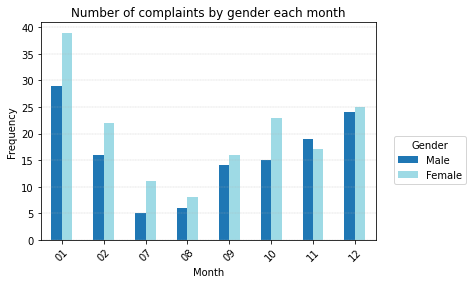

In [15]:
ax = counts.CustomerID.plot(kind='bar',stacked = False, colormap='tab20')

plt.xlabel ('Month')
plt.xticks(rotation = 45)
plt.ylabel ('Frequency')
plt.title('Number of complaints by gender each month')
plt.legend(title='Gender', bbox_to_anchor=(1.04, 0.5), loc="upper left", labels=['Male', 'Female'])
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
plt.show()

In [16]:
counts_age = df_complaints.groupby(['Month', 'AgeCategory']).count().unstack()

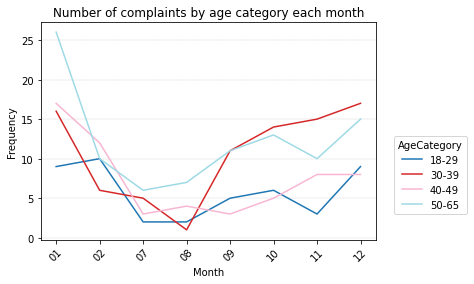

In [17]:
ax = counts_age.CustomerID.plot(kind='line',stacked = False, colormap='tab20')

plt.xlabel ('Month')
plt.xticks(rotation = 45)
plt.ylabel ('Frequency')
plt.title('Number of complaints by age category each month')
plt.legend(title='AgeCategory', bbox_to_anchor=(1.04, 0.5), loc="upper left", labels=['18-29', '30-39', '40-49', '50-65'])
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
plt.show()